In [75]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import cufflinks as cf

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode


cf.go_offline(connected=True)
init_notebook_mode(connected=True)
df = df[df.orders > 0].dropna()
df = pd.read_csv('winning_booths_data.csv')
df.days_to_sale = pd.to_numeric(df.days_to_sale, errors='coerce')
df.days_as_user = pd.to_numeric(df.days_as_user, errors='coerce')
df.orders = pd.to_numeric(df.orders, errors='coerce')
df.items_for_sale = pd.to_numeric(df.items_for_sale, errors='coerce')
df.view_count = pd.to_numeric(df.view_count, errors='coerce')
df.offers = pd.to_numeric(df.offers, errors='coerce')
df = df[df.featured_category_id.isin(['no_category', 'fashion', 'home_garden', 'health_beauty', 'parts_accessories', 'jewelry_watches'])]

df.featured_category_id.unique()

array(['no_category', 'home_garden', 'health_beauty', 'fashion',
       'jewelry_watches', 'parts_accessories'], dtype=object)

/Users/kevin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



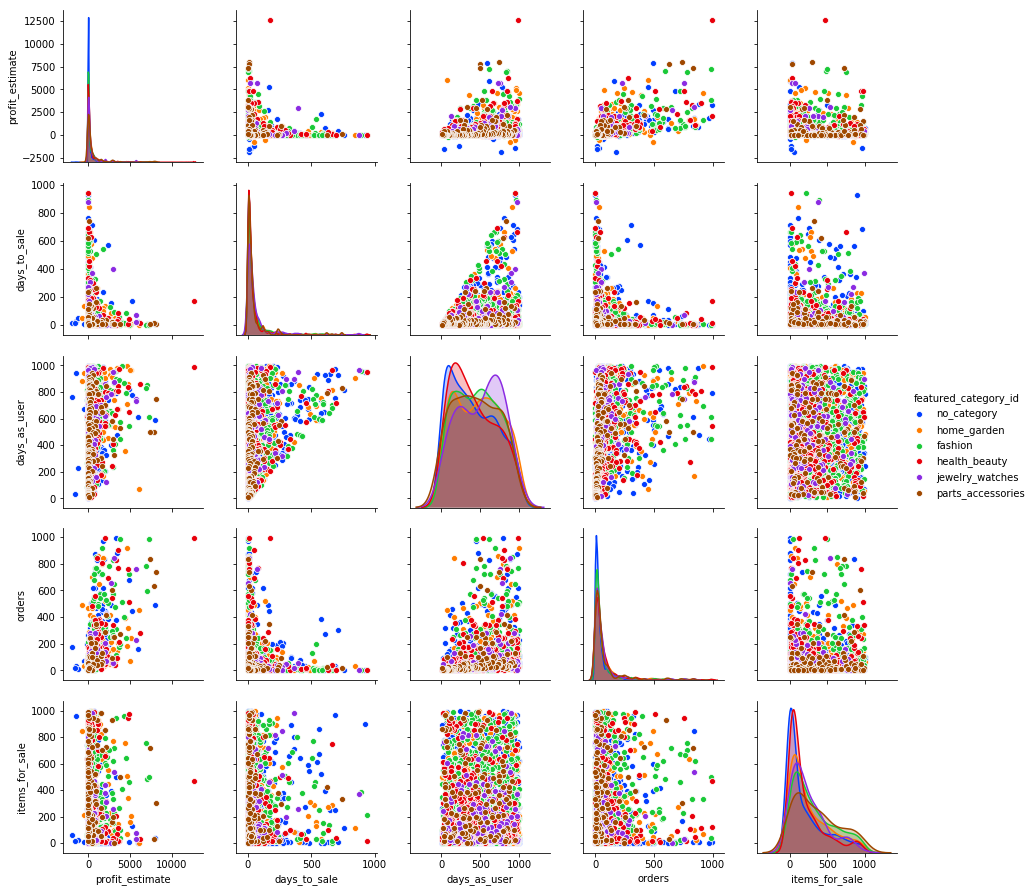

In [79]:

df.dropna(subset=['items_for_sale', 'orders'], inplace=True)
pair_df =  df.loc[df['days_as_user'].notnull(),['featured_category_id','profit_estimate','days_to_sale', 'days_as_user','orders','items_for_sale']].copy()
sns.pairplot(pair_df, hue="featured_category_id",  palette="bright", kind="scatter")
plt.show()


In [ ]:
df = df[df.year_sales > 0]
df.year_sales = pd.to_numeric(df.year_sales, errors='coerce')
df = df.sort_values(by=['year_sales'], ascending=False)
df['seller_id'] = df['seller_id'].astype(str)
df['user_name'] = df['user_name'].astype(str)
df['text'] = (df['user_name'] + " " + df['seller_id']).astype(str)
sum_fvf = df.year_fvf.sum()
df['percent_fvf'] = [x / sum_fvf for x in df.year_fvf]
df.percent_fvf = pd.Series(["{0:.1f}%".format(val * 100) for val in df.percent_fvf], index = df.index)